In [1]:
# Importing Necesssary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
# Loading the Dataset
dataset = pd.read_csv('/content/RPMDataset.csv')

In [3]:
# Dataset Shape
dataset.shape

(938, 2)

In [4]:
# Dataset structure 
dataset.describe()

,Steering Torque,Motor RPM
count,938.000000,938.000000
mean,8.235205,754.954933
std,3.601768,279.441363
min,5.000000,291.805556
25%,5.000080,474.480578
50%,6.907000,760.460402
75%,11.070000,1050.483192
max,18.000000,1050.500000


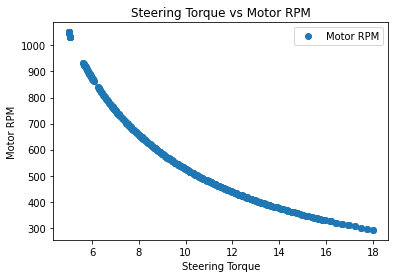

In [5]:
# Dataset Plot
dataset.plot(x='Steering Torque', y='Motor RPM', style='o')  
plt.title('Steering Torque vs Motor RPM')  
plt.xlabel('Steering Torque')  
plt.ylabel('Motor RPM')  
plt.show()

In [6]:
x = dataset['Steering Torque'].values.reshape(-1,1)
y = dataset['Motor RPM'].values.reshape(-1,1)

In [7]:
# Performing Linear Regression and Training
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred=lm.predict(x.reshape(-1,1))

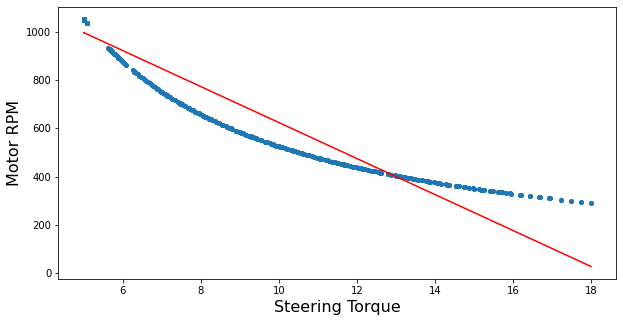

In [9]:
# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Steering Torque',fontsize=16)
plt.ylabel('Motor RPM',fontsize=16)
plt.show()

In [10]:
# Root Mean Square Error for Linear Regression
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 78.66235587779299


In [11]:
# Polynomial Regression and Training
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

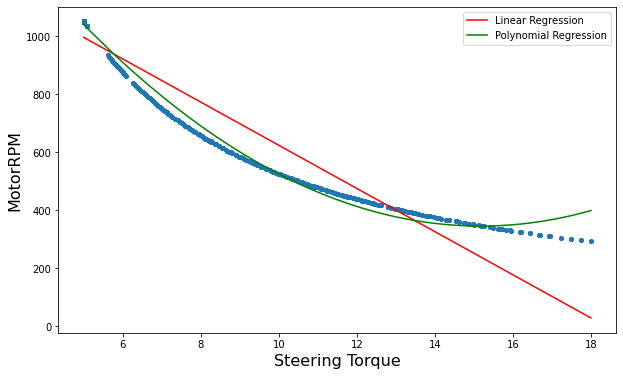

In [12]:
# Plotting Linear vs Polynomial Regression
poly_pred=pipe.predict(x.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Steering Torque',fontsize=16)
plt.ylabel('MotorRPM',fontsize=16)
plt.legend()
plt.show()

In [14]:
#RSME for Polynomial Regression
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Polynomial Regression=> 392.6985554271906
